# **Praktikum 1**

### **Langkah 1 - Import Library**

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### **Langkah 2 - Load Data dan Visualisasi**

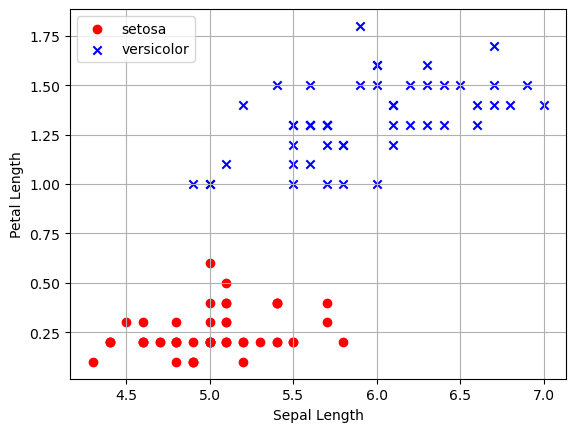

In [74]:
# Load dataset
df = pd.read_csv('data/Iris.csv')

# Filter data untuk setiap jenis bunga
setosa = df[df['Species'] == 'Iris-setosa']
versicolor = df[df['Species'] == 'Iris-versicolor']

# Tentukan kolom untuk plot (SepalLengthCm dan PetalLengthCm)
a, b = 'SepalLengthCm', 'PetalWidthCm'

# Plot scatter untuk setiap jenis bunga
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

# Label sumbu dan legenda
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()


### **Langkah 3 - Membuat Kelas Perceptron**

In [90]:
class Perceptron(object):
    def __init__(self, eta=0.1, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### **Langkah 4 - Pilih Data dan Encoding Label**

In [91]:
y = df.iloc[0:100, 5].values  # Species column
y = np.where(y == 'Iris-setosa', -1, 1)  # Encode labels
X = df.iloc[0:100, [1, 4]].values  # SepalLengthCm and PetalWidthCm

### **Langkah 5 - Fitting Model**

In [92]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

### **Langkah 6 - Visualisasi Nilai Error Per Epoch**

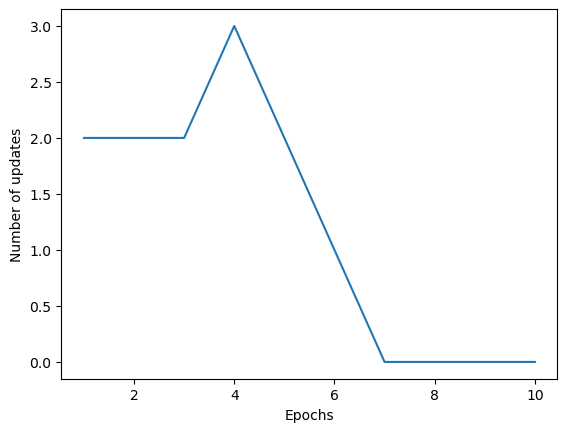

In [93]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

### **Langkah 7 - Visualiasasi Decision Boundary**

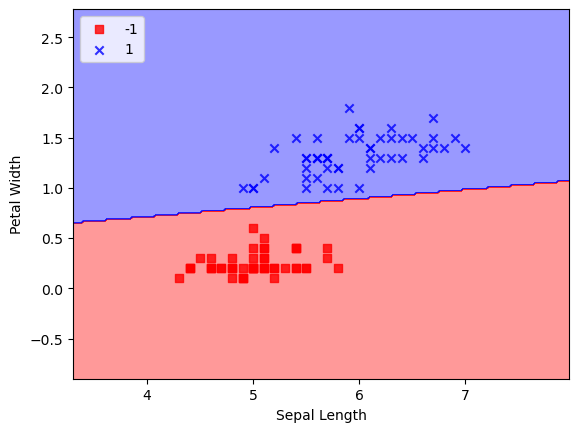

In [96]:
# Let's define the function `plot_decision_regions` and then call it to visualize the decision regions
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # Setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # Plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    # Use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    # Draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # Plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=[cmap(idx)], marker=markers[idx], label=cl)

# Call the function to visualize the decision regions for the Perceptron model
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.legend(loc='upper left')
plt.show()
